In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Regression
    - Relationship between dependent & independent variables
    - Predict continuous outcomes
## Linear Regression
    - relation between data points with a stright line
    - Equation: y = mx + b
    -the line can be used to predict future values


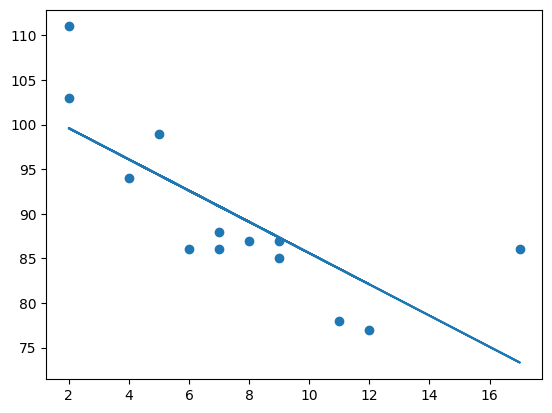

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

`slope, intercept, r, p, std_err = stats.linregress(x, y)`
this is the linear regression function.
#### stats.linregress(x, y) 
* performs linear regression on the data
* it finds the best-fit line through the points (x, y).

The line has the equation:
y = slope * x + intercept
- slope: the steepness of the line
- intercept: where the line crosses the y-axis  
- r: correlation coefficient (how well the line fits the data)
- p: p-value (statistical significance of the correlation)
- std_err: standard error of the estimate (uncertainty in the slope)

In [3]:
print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation (r):", r)
print("P-value:", p)
print("Standard Error:", std_err)


Slope: -1.7512877115526118
Intercept: 103.10596026490066
Correlation (r): -0.758591524376155
P-value: 0.002646873922456106
Standard Error: 0.453536157607742


| Code                   | Meaning                                                   |
| ---------------------- | --------------------------------------------------------- |
| `myfunc(x)`            | Predict y for one value of x                              |
| `map(myfunc, x)`       | Predict y for all values in the list x                    |
| `list(map(myfunc, x))` | Convert all predictions into a list (so we can plot them) |
| `mymodel`              | List of predicted y-values                                |


In [5]:
# for above ,assume x is age and y is speed of car the you van predect speed of car for any age using myfunc(age)
age = 10
predicted_speed = myfunc(age)
print("Predicted speed for age", age, "is", predicted_speed)

Predicted speed for age 10 is 85.59308314937454


Starting from a basic, A linear Regression is finding a stright line fit through a set of data. This works well when there the true underlying function is linear.

**Example**
We use features (independent variables) to predict a "response" (dependent variable). For example we might want to regress num_hours_studied onto exam_score - in other words we predict exam score from number of hours studied

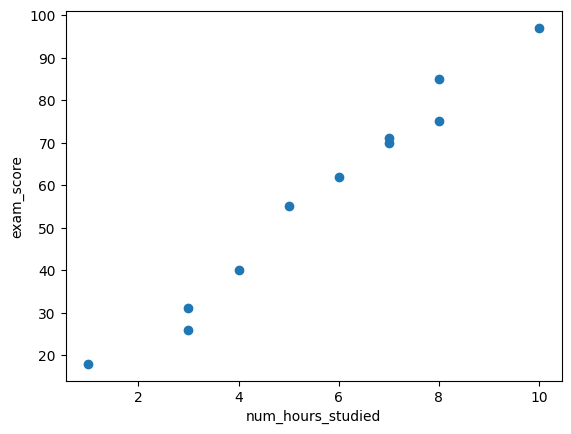

In [7]:
import numpy as np
import matplotlib.pyplot as plt
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()


### Linear Model
#### Hypothesis
A linear model makes a hypothesis about the true nature of the underlying function which is **linear**. We express this hypothesis as:
`y = mx + b`
Where:
* **y**: dependent variable (response)
* **x**: independent variable (feature)
* **m**: slope of the line (how much y changes for a unit change in x)
* **b**: y-intercept (value of y when x is 0)

The above was an example of **simple linear regression** with one independent variable (x) and one dependent variable (y).

In **multiple linear regression**, we have more than one independent variable. The hypothesis for multiple linear regression is expressed as:
`y = b0 + b1*x1 + b2*x2 + ... + bn*xn`

Where:

* **y**: dependent variable (response)
* **x1, x2, ..., xn**: independent variables (features)
* **b0**: intercept term (value of y when all x’s are 0)
* **b1, b2, ..., bn**: coefficients (slopes) for each independent variable

In **vector form**, this can be written as:
`y = Xβ + ε`

Where:

* **X**: design matrix (contains all data points and features, including a column of ones for the intercept)
* **β**: vector of model parameters (coefficients)
* **ε**: error term (difference between actual and predicted values)


### Design Matrix

In linear regression, the **design matrix (X)** represents all the input data (features) used to train the model.

If we have **m data points** and **n features**, our design matrix will have:

* **m rows** → one for each data point
* **n + 1 columns** → one for each feature **plus** one column for the bias (intercept term, all ones)

So, the shape of the design matrix is **(m × (n + 1))**.



#### Example

Let’s continue with our exam score example.
Suppose we have **2 features**:

* `x1`: Number of hours studied
* `x2`: Number of hours slept the night before the exam

If we have **4 students (4 data points)**, our design matrix will be of shape **(4 × 3)** — because we include one extra column for the bias term.

The design matrix **X** might look like this:

| Bias (1) | Hours Studied (x1) | Hours Slept (x2) |
| -------- | ------------------ | ---------------- |
| 1        | 2                  | 7                |
| 1        | 4                  | 6                |
| 1        | 6                  | 8                |
| 1        | 8                  | 5                |

Here:

* The **first column** of all ones represents the **bias term** (intercept).
* The **next columns** represent the **features** (x1 and x2).

**Note:** The **response variable (y)**, such as exam scores, is **not included** in the design matrix. It is kept separately when training the model.




In [16]:
!pip install scikit-learn




  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.7 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.7 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.4/8.7 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 1.8 MB/s eta 0:00:04
   ------------- -------------------------- 2.9/8.7 


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import sklearn
print(sklearn.__version__)


1.7.2


slope (m): [9.40225564]
intercept (b): 4.278195488721785


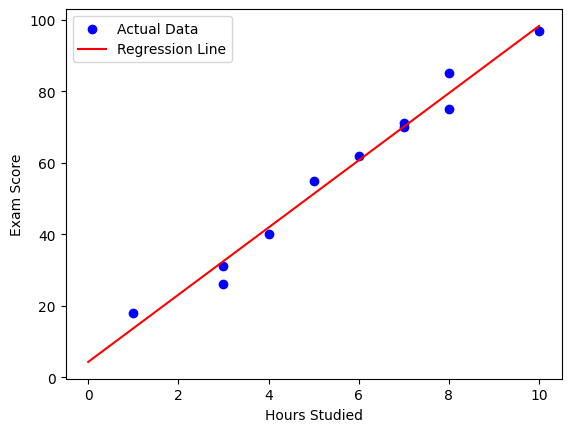

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

# creating linear regression model
exam_model = linear_model.LinearRegression()

# reshaping the data
x = np.expand_dims(num_hours_studied, axis=1)  # independent variable
y = exam_score                                 # dependent variable

# fitting the model
exam_model.fit(x, y)  # train the model

a = exam_model.coef_      # slope (m)
b = exam_model.intercept_ # intercept (b)

print("slope (m):", a)
print("intercept (b):", b)

# Visualize the results
plt.scatter(num_hours_studied, exam_score, color='blue', label='Actual Data')

x_line = np.linspace(0, 10, 100)        # generate points for line
y_line = a * x_line + b                 # regression line

plt.plot(x_line, y_line, 'r', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


Slope (a): [4.06666667]
Intercept (b): 47.0


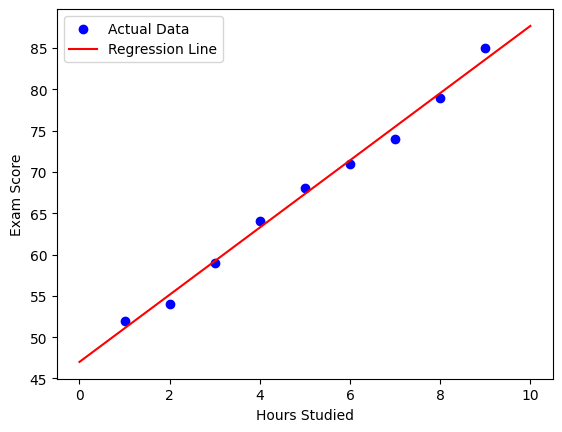

In [22]:
#Import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # ✅ correct modern import

# Example data
num_hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
exam_score = np.array([52, 54, 59, 64, 68, 71, 74, 79, 85])

# Fit the model
x = np.expand_dims(num_hours_studied, axis=1)   # reshape into 2D array
y = exam_score

exam_model = LinearRegression()                 # no need for normalize=True
exam_model.fit(x, y)

# Get model parameters
a = exam_model.coef_       # slope (m)
b = exam_model.intercept_  # intercept (b)

print("Slope (a):", a)
print("Intercept (b):", b)

# Visualize the results
plt.scatter(num_hours_studied, exam_score, color='blue', label='Actual Data')

# Generate regression line
x_line = np.linspace(0, 10, 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, 'r', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()



###  Explanation:

* **`LinearRegression()`** → Creates the model that fits a straight line.
* **`fit(x, y)`** → Finds the best-fitting line through the data.
* **`coef_`** → The slope (how much the exam score increases per hour studied).
* **`intercept_`** → The base score (expected score with 0 hours studied).
* **`plt.scatter()`** → Shows actual data points.
* **`plt.plot()`** → Draws the predicted regression line.




## What is Good fit ?
Tipically we use "mean squared error" (MSE) to measure how well our linear regression model fits the data.
 
 
MSE = (1/n) * Σ(actual - predicted)²
Where:  
* **n**: number of data points
* **actual**: actual observed values
* **predicted**: predicted values from the model

![alt text](residual.png)

Here you can see that this is measuring how far away each of real data points are from the predicted point which makes a good sense.